# PET Preprocessing Notebook

In [1]:
from notebook_utils import *

In [2]:
import os, glob

import numpy as np
import matplotlib.pyplot as plt

import SimpleITK as sitk
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from pathlib import Path

# Histogram and Statistics Visualization

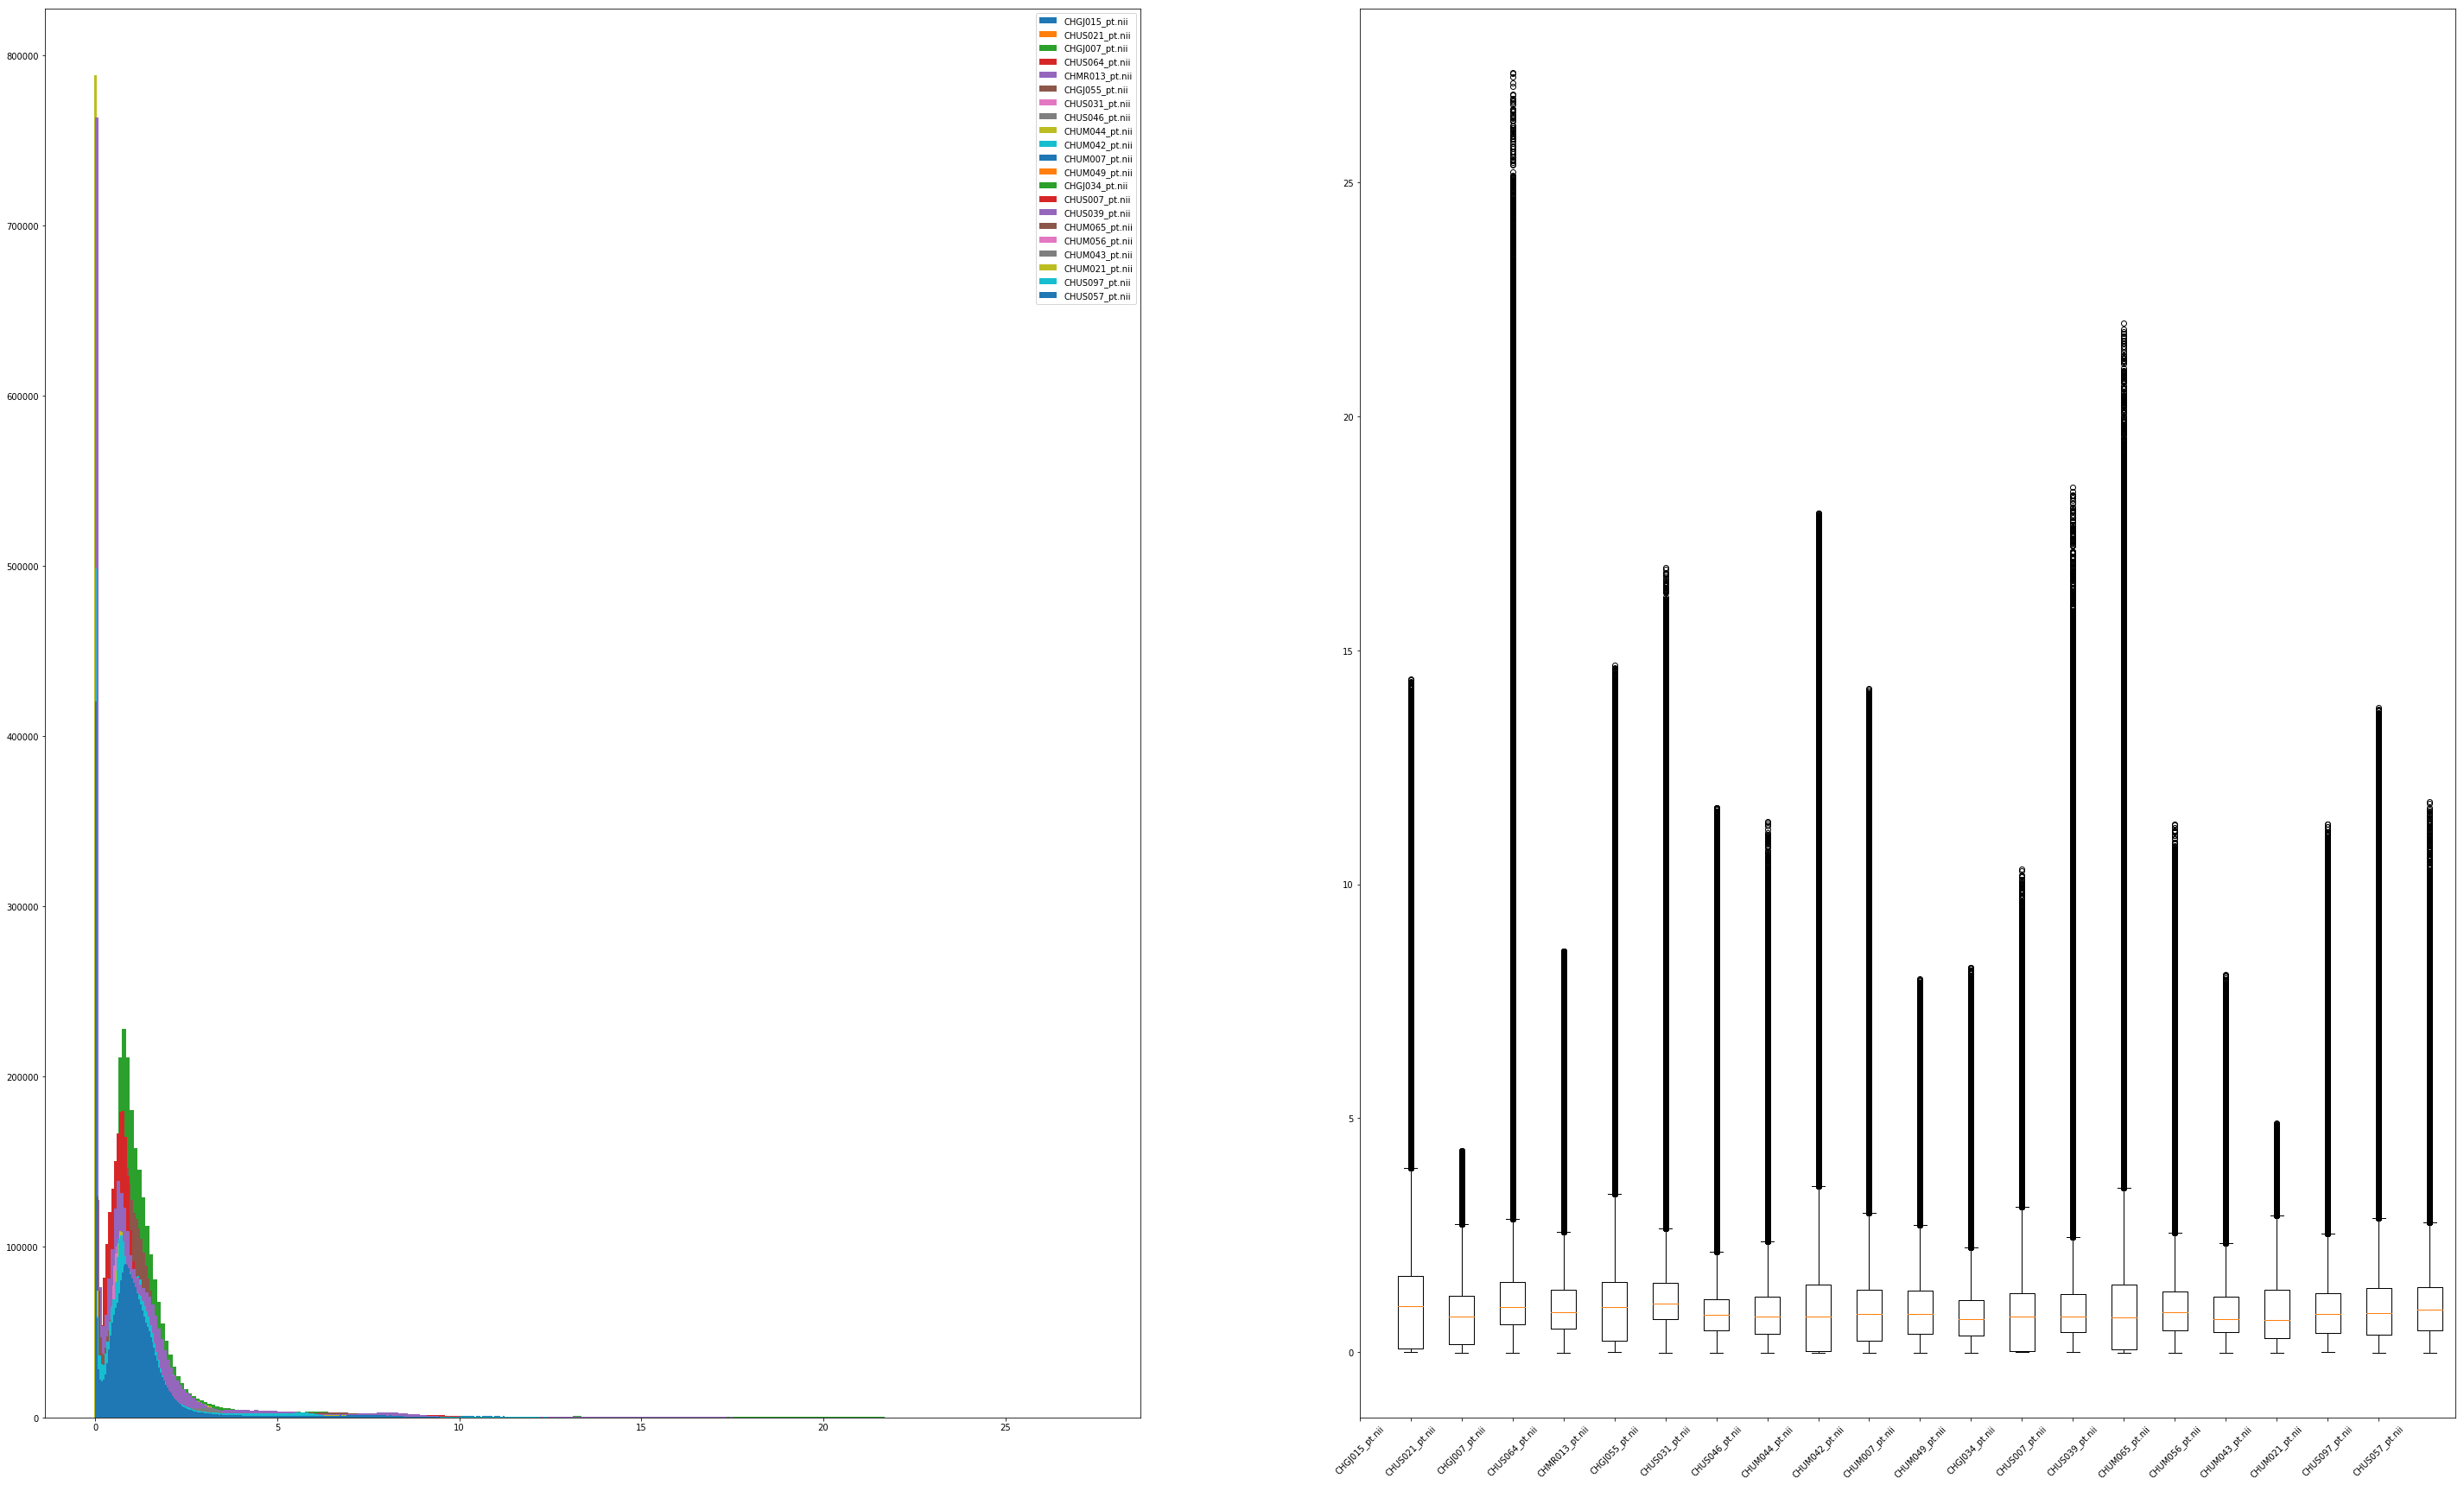

In [4]:
PET_dict = {"image": [], "label": []}
f, ax = plt.subplots(1, 2, figsize=(50, 30))

for fn in Path("/workspace/data/HECKTOR/hecktor_train/val").rglob("*_pt.nii.gz"):
    
    # Get image from filename, read array and flatten
    sitk_image_PET = read_nifti(str(fn), print_info=False)
    array_PET = sitk.GetArrayFromImage(sitk_image_PET)
    flat_array_PET = array_PET.flatten()
    
    # Get patient name from filename
    patient_name= fn.stem
    
    # Append array and filename for boxplot
    PET_dict["image"].append(sitk_image_PET)
    PET_dict["label"].append(patient_name)
    
    # Histogram for each PET array, overlayed later
    ax[0].hist(flat_array_PET, bins=256, label=patient_name)
    
# Draw Boxplots to show min-max values
ax[1].boxplot([sitk.GetArrayFromImage(image).flatten() for image in PET_dict["image"]])

ax[1].set_xticks(range(len(PET_dict["label"])))
ax[1].set_xticklabels(PET_dict["label"], rotation=45)
                 
ax[0].legend(loc='upper right')    
plt.show()

In [5]:
def z_score(image, min_range=0.01, max_range=5):
    array = sitk.GetArrayFromImage(image)
    array = array.astype(np.float32)
    output = np.clip(array, min_range, max_range)
    output = (output - output.mean() )/ ( output.std())
    result = sitk.GetImageFromArray(output)
    result.CopyInformation(image)
    return result

In [8]:
for image, label in zip(PET_dict["image"], PET_dict["label"]):
    print(f"Display for Image: {label}")
    res = z_score(image)
    volume = sitk.GetArrayFromImage(res)
    plt.figure(1)
    def volume_animation(x):
        plt.imshow(volume[x], cmap='jet')
        return x

    interact(volume_animation, x=(0, volume.shape[0]-1))

Display for Image: CHGJ015_pt.nii


<Figure size 432x288 with 0 Axes>

interactive(children=(IntSlider(value=71, description='x', max=143), Output()), _dom_classes=('widget-interact…

Display for Image: CHUS021_pt.nii


<Figure size 432x288 with 0 Axes>

interactive(children=(IntSlider(value=71, description='x', max=143), Output()), _dom_classes=('widget-interact…

Display for Image: CHGJ007_pt.nii


<Figure size 432x288 with 0 Axes>

interactive(children=(IntSlider(value=71, description='x', max=143), Output()), _dom_classes=('widget-interact…

Display for Image: CHUS064_pt.nii


<Figure size 432x288 with 0 Axes>

interactive(children=(IntSlider(value=71, description='x', max=143), Output()), _dom_classes=('widget-interact…

Display for Image: CHMR013_pt.nii


<Figure size 432x288 with 0 Axes>

interactive(children=(IntSlider(value=71, description='x', max=143), Output()), _dom_classes=('widget-interact…

Display for Image: CHGJ055_pt.nii


<Figure size 432x288 with 0 Axes>

interactive(children=(IntSlider(value=71, description='x', max=143), Output()), _dom_classes=('widget-interact…

Display for Image: CHUS031_pt.nii


<Figure size 432x288 with 0 Axes>

interactive(children=(IntSlider(value=71, description='x', max=143), Output()), _dom_classes=('widget-interact…

Display for Image: CHUS046_pt.nii


<Figure size 432x288 with 0 Axes>

interactive(children=(IntSlider(value=71, description='x', max=143), Output()), _dom_classes=('widget-interact…

Display for Image: CHUM044_pt.nii


<Figure size 432x288 with 0 Axes>

interactive(children=(IntSlider(value=71, description='x', max=143), Output()), _dom_classes=('widget-interact…

Display for Image: CHUM042_pt.nii


<Figure size 432x288 with 0 Axes>

interactive(children=(IntSlider(value=71, description='x', max=143), Output()), _dom_classes=('widget-interact…

Display for Image: CHUM007_pt.nii


<Figure size 432x288 with 0 Axes>

interactive(children=(IntSlider(value=71, description='x', max=143), Output()), _dom_classes=('widget-interact…

Display for Image: CHUM049_pt.nii


<Figure size 432x288 with 0 Axes>

interactive(children=(IntSlider(value=71, description='x', max=143), Output()), _dom_classes=('widget-interact…

Display for Image: CHGJ034_pt.nii


<Figure size 432x288 with 0 Axes>

interactive(children=(IntSlider(value=71, description='x', max=143), Output()), _dom_classes=('widget-interact…

Display for Image: CHUS007_pt.nii


<Figure size 432x288 with 0 Axes>

interactive(children=(IntSlider(value=71, description='x', max=143), Output()), _dom_classes=('widget-interact…

Display for Image: CHUS039_pt.nii


<Figure size 432x288 with 0 Axes>

interactive(children=(IntSlider(value=71, description='x', max=143), Output()), _dom_classes=('widget-interact…

Display for Image: CHUM065_pt.nii


<Figure size 432x288 with 0 Axes>

interactive(children=(IntSlider(value=71, description='x', max=143), Output()), _dom_classes=('widget-interact…

Display for Image: CHUM056_pt.nii


<Figure size 432x288 with 0 Axes>

interactive(children=(IntSlider(value=71, description='x', max=143), Output()), _dom_classes=('widget-interact…

Display for Image: CHUM043_pt.nii


<Figure size 432x288 with 0 Axes>

interactive(children=(IntSlider(value=72, description='x', max=144), Output()), _dom_classes=('widget-interact…

Display for Image: CHUM021_pt.nii


<Figure size 432x288 with 0 Axes>

interactive(children=(IntSlider(value=71, description='x', max=143), Output()), _dom_classes=('widget-interact…

Display for Image: CHUS097_pt.nii


<Figure size 432x288 with 0 Axes>

interactive(children=(IntSlider(value=72, description='x', max=144), Output()), _dom_classes=('widget-interact…

Display for Image: CHUS057_pt.nii


<Figure size 432x288 with 0 Axes>

interactive(children=(IntSlider(value=71, description='x', max=143), Output()), _dom_classes=('widget-interact…